In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

1. Load the data file and explore the data, showing size, data descriptions, data distributions with boxplot, and correlation between columns

In [4]:
df = pd.read_csv('data.csv')
print(f'{df.head()}\n')
print(f'{df.shape}\n')
print(f'{df.describe()}\n')
print(f'{df.info()}\n')
print(f'{df.isnull().sum()}\n')


        X00       X01       X02       X03       X04       X05       X06  \
0 -0.016771 -0.026036 -0.001474  0.104545  0.352163  0.023372  0.003706   
1 -0.011618  0.025699 -0.026818  0.053014  0.613195 -0.012447  0.029382   
2  0.027478  0.009282 -0.020700  0.630085  0.612415 -0.004157  0.008240   
3 -0.003170 -0.001697 -0.028924  0.389900  0.000182  0.027526  0.012792   
4 -0.039508 -0.009104  0.021215  0.951426  0.778600  0.018246 -0.000294   

        X07       X08       X09         y  
0  0.004963 -0.007113  0.022166  3.288439  
1 -0.006348 -0.036920 -0.016464 -2.333510  
2  0.019062  0.010821 -0.012983  2.259783  
3 -0.021192 -0.011102  0.015352  2.939127  
4 -0.012900  0.004178  0.014846  1.623948  

(1000, 11)

               X00          X01          X02           X03           X04  \
count  1000.000000  1000.000000  1000.000000  1.000000e+03  1.000000e+03   
mean      0.000127     0.000297    -0.000421  3.378287e-01  2.521912e-01   
std       0.023475     0.018878     0.019124

<Axes: >

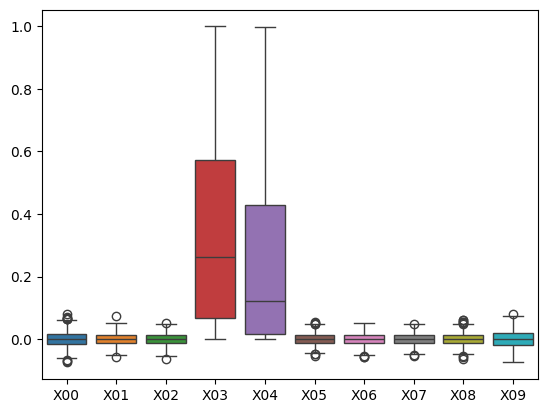

In [5]:
sns.boxplot(df.drop(columns=['y']))

<Axes: >

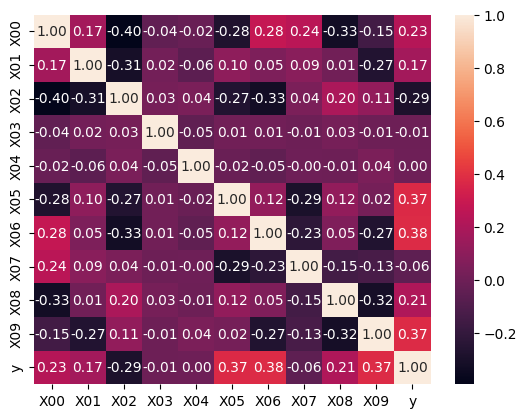

In [11]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f')

2. Comment the exploration of step 1 pointing out if there are predicting
columns having the absolute value of correlation with the target less
than 0.15

as we can observe from the correlation matrix, we see that the columns 'X03', 'X04' and 'X07' have a correlation value < 0.15, meaning they have a low correlation with the target outcome.

3. train test a multivariate linear regressor and show the Root Mean
Squared Error

In [18]:
x = df.drop(columns=['y'])
y=df['y']

#FULL DATASET LINEAR REGRESSION

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42)

lr = LinearRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest,ypred))
print(f'RMSE of Linear Regressor model: {rmse:.4f}')


RMSE of Linear Regressor model: 0.8820


4. train test a multivariate linear regressor on the reduced dataset obtained dropping the columns loosely correlated with the target, and show the Root Mean Squared Error

In [28]:
xr = df.drop(columns=['X03', 'X04','X07','y'])
yr = df['y']

xrtrain, xrtest, yrtrain, yrtest = train_test_split(xr, yr, random_state=42)

lrr = LinearRegression()
lrr.fit(xrtrain, yrtrain)
yrpred = lrr.predict(xrtest)

rmser = np.sqrt(mean_squared_error(yrtest, yrpred))
print(f'RMSE of Linear Regressor model on reduced dataframe: {rmser:.4f}')

RMSE of Linear Regressor model on reduced dataframe: 0.9971


5. train and test on the reduced dataset a decision tree regressor, and show the Root Mean Squared Error

In [29]:
dt = DecisionTreeRegressor()
dt.fit(xrtrain, yrtrain)
ydtpred = dt.predict(xrtest)

rmsedt = np.sqrt(mean_squared_error(yrtest, ydtpred))
print(f'RMSE of Decision Tree Regressor model on reduced dataframe: {rmsedt:.4f}')

RMSE of Decision Tree Regressor model on reduced dataframe: 2.1846


6. optimise the depth of the decision tree regressor of step 5 searching for the minimum Root Mean Squared Error with cross-validation, and show the best RMSE

In [30]:
params_grid = {
    'max_depth' : [2,4,6,8],
    'random_state': [42],
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error']
}

grid = GridSearchCV(estimator = DecisionTreeRegressor(random_state=42), cv=3, param_grid = params_grid, scoring='neg_mean_squared_error')
grid.fit(xrtrain, yrtrain)
ypredgrid = grid.predict(xrtest)

rmsegrid = np.sqrt(mean_squared_error(yrtest, ypredgrid))
print(f'best params: {grid.best_params_}')
print(f'RMSE of Decision Tree Regressor with grid search model on reduced dataframe:\n RMSE {rmsegrid:.4f}')

best params: {'criterion': 'absolute_error', 'max_depth': 6, 'random_state': 42}
RMSE of Decision Tree Regressor with grid search model on reduced dataframe:
 RMSE 1.9592


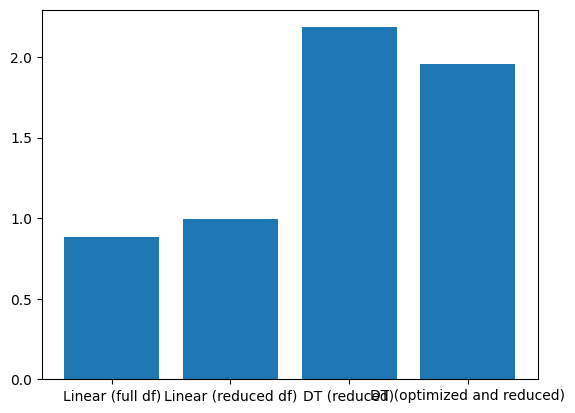

In [33]:
models_names = ['Linear (full df)', 'Linear (reduced df)', 'DT (reduced)', 'DT (optimized and reduced)']
model_rmse = [rmse, rmser, rmsedt, rmsegrid]

bars = plt.bar(models_names, model_rmse)
plt.show()

7. Comment the results

1. The Linear Regression models performed significantly better than the Decision Tree models in this dataset (RMSE ~0.88 vs ~1.96). This suggests that the relationship between the features and the target is likely linear, which linear models capture well, while Decision Trees struggle to approximate smooth linear trends.

2. Removing the columns with low correlation (X03, X04, X07) caused the performance of the Linear Regression to worsen slightly (RMSE increased from 0.88 to 0.99). This indicates that even though those columns had low individual correlation, they likely contained some useful information for the prediction when combined with other features.

3. Optimizing the Decision Tree reduced the error from ~2.14 to ~1.96. The best depth found was 6. While this is an improvement, it is still far from the performance of the Linear Regression, confirming that a tree-based model is probably not the best choice for this specific data distribution.